In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read CSV

In [2]:
hd_df = pd.read_csv("heart_v2.csv")
hd_df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
hd_df.shape

(270, 5)

In [5]:
hd_df.describe(percentiles=[0.75, 0.80, 0.85, 0.90, 0.93, 0.95, 0.99])

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
80%,62.200000,1.000000,144.200000,288.200000,1.000000
85%,64.000000,1.000000,150.000000,301.300000,1.000000
90%,66.000000,1.000000,152.000000,309.000000,1.000000
93%,67.000000,1.000000,160.000000,319.340000,1.000000


In [6]:
hd_df.nunique()

age               41
sex                2
BP                47
cholestrol       144
heart disease      2
dtype: int64

### Observation
- Data looks clean
- `sex` is a categorical column
- All are integer data

### Columns relationship
- We have to identify the data against `heart disease` column

### Outliers common implementation

In [7]:
# Remove Outliers
def remove_outliers(dataFrame, col):
    q1 = dataFrame[col].quantile(0.1)
    q3 = dataFrame[col].quantile(0.9)
    value = q3-q1
    lower_value  = q1 - (1.5 * value)
    higer_value  = q3 + (1.5 * value)
    out = dataFrame[(dataFrame[col] <= higer_value) & (dataFrame[col] >= lower_value)]
    return out


In [8]:
# Get outliers count
def get_outliers(dataFrame, col):
    q1 = dataFrame[col].quantile(0.1)
    q3 = dataFrame[col].quantile(0.9)
    value = q3-q1
    lower_value  = q1 - (1.5 * value)
    higer_value  = q3 + (1.5 * value)
    out = dataFrame[(dataFrame[col] <= higer_value) & (dataFrame[col] >= lower_value)]
    return pd.concat([dataFrame, out]).drop_duplicates(keep=False)

### Age vs heart disease

In [9]:
age_out = get_outliers(hd_df, 'age')
print(age_out.shape)
age_out.head()

(0, 5)


,age,sex,BP,cholestrol,heart disease


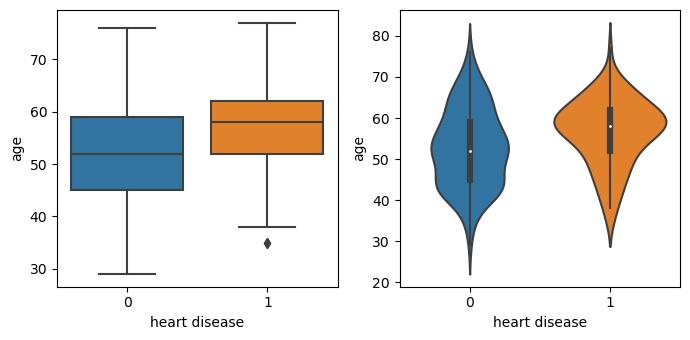

In [10]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 2)
sns.boxplot(data=hd_df, y='age', x='heart disease', ax=axes[0])

sns.violinplot(data=hd_df, y='age', x='heart disease', ax=axes[1])

plt.title = 'Age vs HeartDisease'
plt.show()

### Sex vs Heart Disease

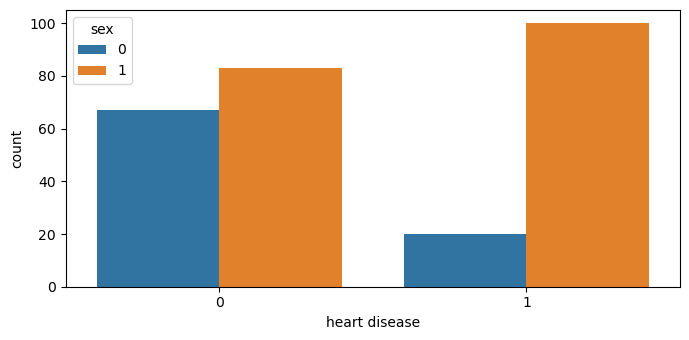

In [11]:
sns.countplot(data=hd_df, x='heart disease', hue='sex')
plt.show()


### Blood pressure vs heart disease

In [12]:
bp_out = get_outliers(hd_df, 'BP')
print(bp_out.shape)
bp_out.head()

(0, 5)


,age,sex,BP,cholestrol,heart disease


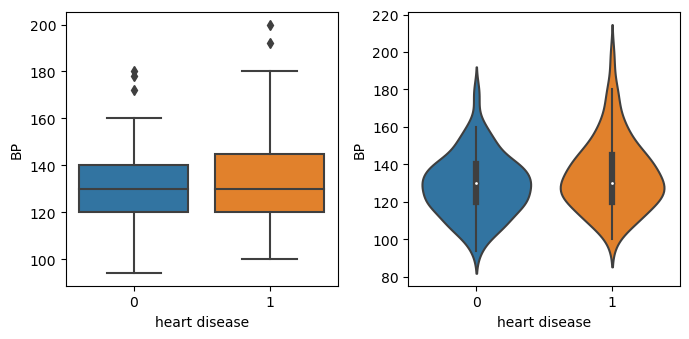

In [13]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 2)
sns.boxplot(data=hd_df, y='BP', x='heart disease', ax=axes[0])

sns.violinplot(data=hd_df, y='BP', x='heart disease', ax=axes[1])
plt.show()

### cholestrol vs heart Disease

In [14]:
ch_out = get_outliers(hd_df, 'cholestrol')
print(ch_out.shape)
ch_out.head()

(1, 5)


,age,sex,BP,cholestrol,heart disease
1,67,0,115,564,0


In [15]:
hd_df = remove_outliers(hd_df, 'cholestrol')

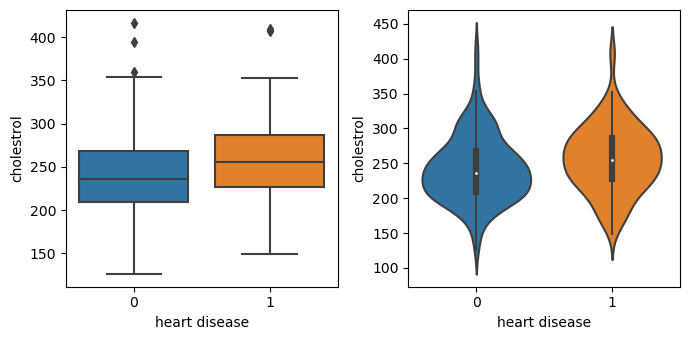

In [16]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 2)
sns.boxplot(data=hd_df, y='cholestrol', x='heart disease', ax=axes[0])

sns.violinplot(data=hd_df, y='cholestrol', x='heart disease', ax=axes[1])
plt.show()

In [17]:
hd_df.shape

(269, 5)

### Observation
- Male are more prone to heart disease
- High cholestrol contributes to disease
- Age plays an important factor in heart disease

### Train and Test split 

In [18]:
from sklearn.model_selection import train_test_split


# To find the best hyperparameter
from sklearn.model_selection import GridSearchCV

In [19]:
X_dt = hd_df.drop('heart disease', axis=1)
y_dt = hd_df['heart disease']

In [20]:
X_dt = hd_df.drop('heart disease', axis=1)
y_dt = hd_df['heart disease']

In [21]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, 
                                                                train_size=0.7, test_size=0.3, 
                                                                random_state=42)

## Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

#Classification report
from sklearn.metrics import classification_report

### Common functionality

In [23]:
def get_dt_graph(dt_classifier, columns):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, 
                    filled=True,rounded=True,
                    feature_names=columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [24]:
def evaluate_model(dt_classifier, X_train, X_test, y_train, y_test):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [25]:
dt = DecisionTreeClassifier()

In [26]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

### Find the best hyperparameters for the decision tree

In [27]:
grid_search = GridSearchCV(estimator=dt,
                          param_grid=params,
                          cv=4, n_jobs=1, verbose=1,
                          scoring='accuracy')

In [28]:
%%time
grid_search.fit(X_dt_train, y_dt_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 318 ms, sys: 3.31 ms, total: 321 ms
Wall time: 321 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [29]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

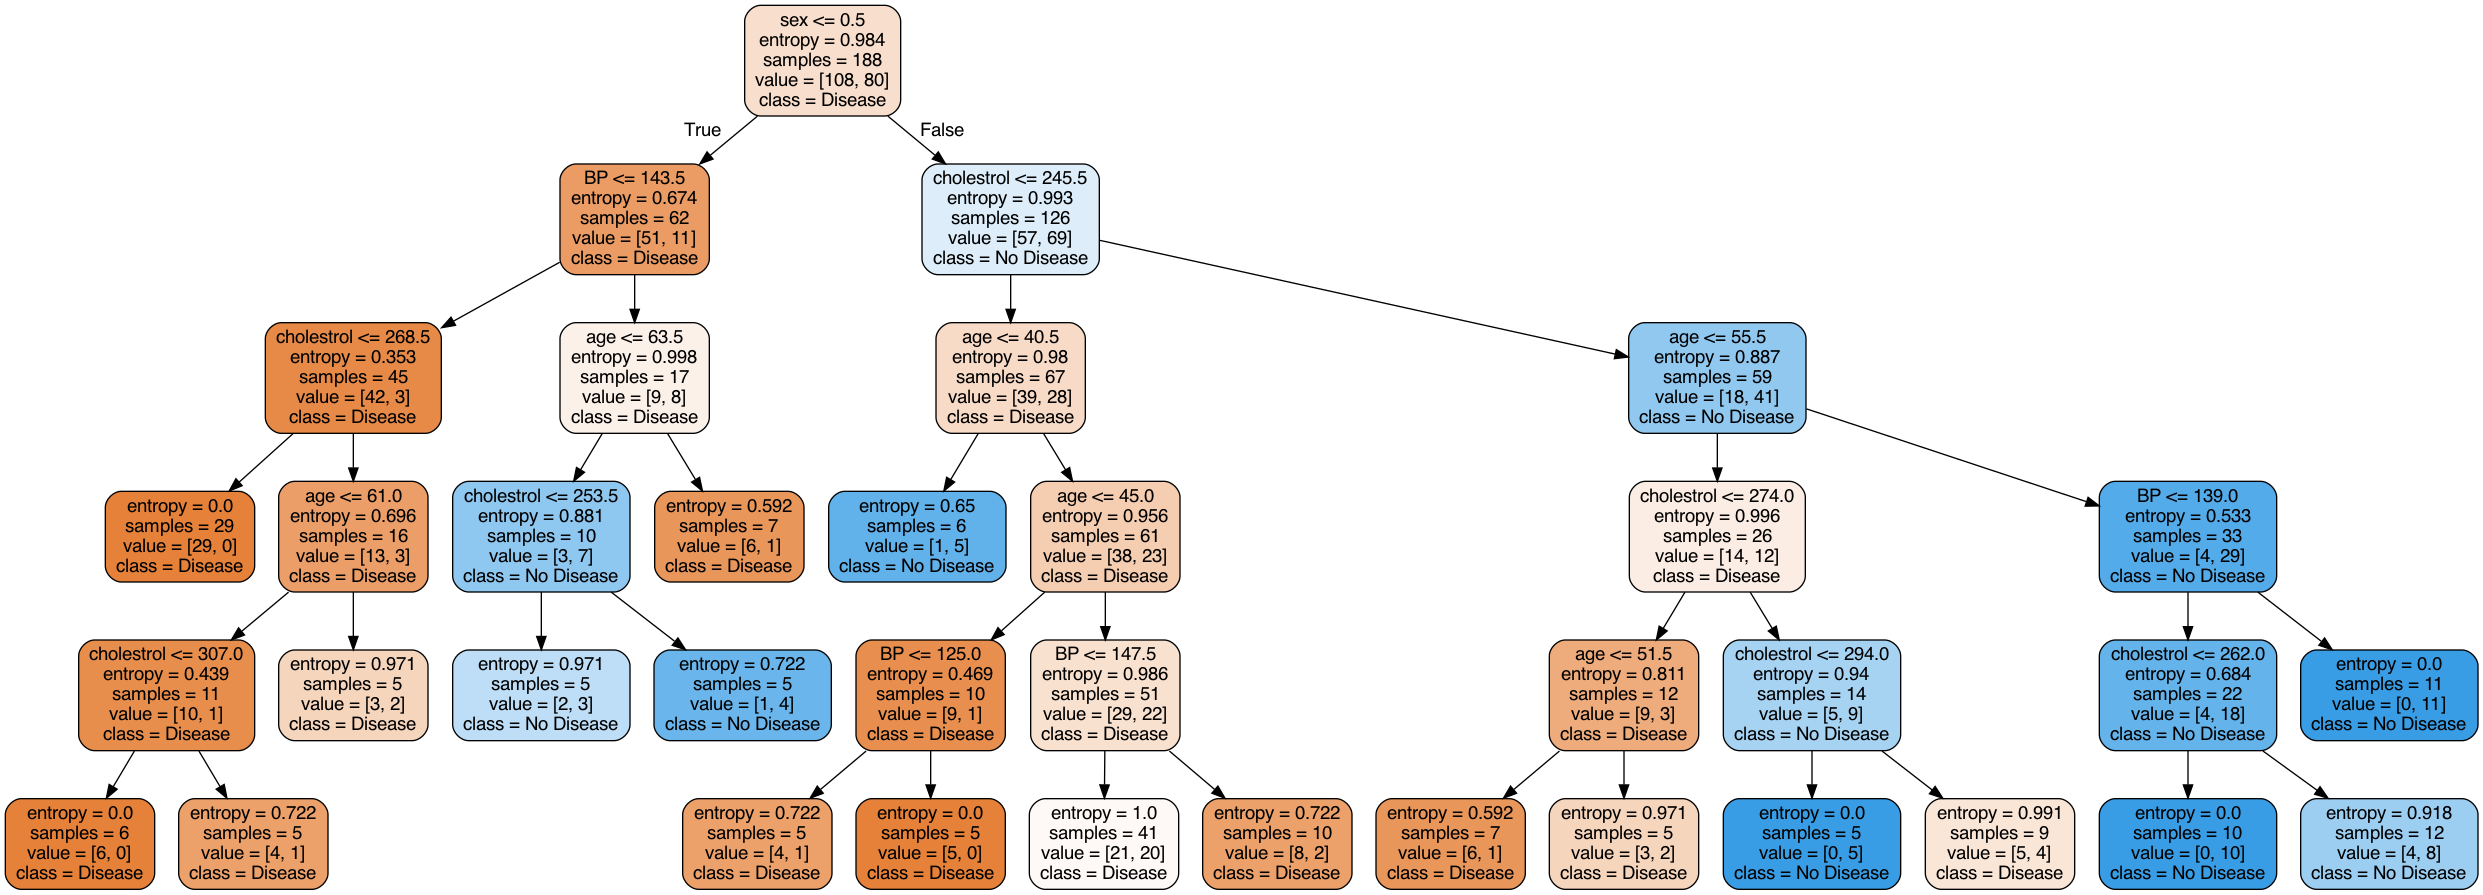

In [30]:
gph = get_dt_graph(dt_best, X_dt_train.columns)
Image(gph.create_png())

### Evaluate the train test score

In [31]:
evaluate_model(dt_best, X_dt_train, X_dt_test, y_dt_train, y_dt_test)

Train Accuracy : 0.776595744680851
Train Confusion Matrix:
[[100   8]
 [ 34  46]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[38  3]
 [27 13]]


### Train classification report

In [32]:
print(classification_report(y_dt_train, dt_best.predict(X_dt_train)))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       108
           1       0.85      0.57      0.69        80

    accuracy                           0.78       188
   macro avg       0.80      0.75      0.76       188
weighted avg       0.79      0.78      0.77       188



### Test classification report

In [33]:
print(classification_report(y_dt_test, dt_best.predict(X_dt_test)))

              precision    recall  f1-score   support

           0       0.58      0.93      0.72        41
           1       0.81      0.33      0.46        40

    accuracy                           0.63        81
   macro avg       0.70      0.63      0.59        81
weighted avg       0.70      0.63      0.59        81



In [34]:
dt_df = pd.DataFrame({'Feature importance': X_dt_train.columns, 'importance score': dt_best.feature_importances_})
dt_df.sort_values(by='importance score', ascending=False)

,Feature importance,importance score
3,cholestrol,0.311919
0,age,0.275963
1,sex,0.227011
2,BP,0.185107
